# Weld Prediction 

## machine learning project 

The dataset contains a total of 1652 rows and 44 columns. The key features include:

**Chemical Composition**: Elements such as Carbon, Silicon, Manganese, Sulphur, Phosphorus, Nickel, Chromium, Molybdenum, Vanadium, and Copper, measured as concentrations (weight \%).

**Mechanical Properties**: Metrics such as Yield Strength (MPa), Ultimate Tensile Strength (MPa), Elongation (\%), and Reduction of Area (\%).

**Impact Toughness and Hardness**: Charpy impact toughness (J), Charpy temperature (°C), and Hardness (kgmm\textsuperscript{-2}).

**Microstructure Details**: Primary ferrite, Ferrite with second phase, Acicular ferrite, Martensite, and Ferrite with carbide aggregate percentages.

**Weld Information**: Weld ID, Electrode details, and Type of weld (e.g., FCA, GMAA, MMA).


In [263]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Importing Data

In [264]:
data_file_path = 'welddb/welddb.data'
headers_file_path = 'welddb/headers.txt'
with open(headers_file_path, 'r') as f:
    headers = [line.strip() for line in f]
df = pd.read_csv(data_file_path, sep=r'\s+', header=None, names=headers)

In [265]:
df.head()

,Carbon concentration (weight%),Silicon concentration (weight%),Manganese concentration (weight%),Sulphur concentration (weight%),Phosphorus concentration (weight%),Nickel concentration (weight%),Chromium concentration (weight%),Molybdenum concentration (weight%),Vanadium concentration (weight%),Copper concentration (weight%),...,Charpy temperature (deg C),Charpy impact toughness (J),Hardness (kgmm-2),50 % FATT,Primary ferrite in microstructure (%),Ferrite with second phase (%),Acicular ferrite (%),Martensite (%),Ferrite with carbide aggregate (%),Weld ID
0,0.037,0.30,0.65,0.008,0.012,0,N,N,N,N,...,N,N,N,N,N,N,N,N,N,Evans-Ni/CMn-1990/1991-0Aaw
1,0.037,0.30,0.65,0.008,0.012,0,N,N,N,N,...,-28,100,N,N,N,N,N,N,N,Evans-Ni/CMn-1990/1991-0Aawch
2,0.037,0.30,0.65,0.008,0.012,0,N,N,N,N,...,-38,100,N,N,N,N,N,N,N,Evans-Ni/CMn-1990/1991-0Aht
3,0.037,0.31,1.03,0.007,0.014,0,N,N,N,N,...,N,N,N,N,N,N,N,N,N,Evans-Ni/CMn-1990/1991-0Baw
4,0.037,0.31,1.03,0.007,0.014,0,N,N,N,N,...,-48,100,N,N,32,28,40,0,0,Evans-Ni/CMn-1990/1991-0Bawch


In [266]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1652 entries, 0 to 1651
Data columns (total 44 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Carbon concentration (weight%)                1652 non-null   float64
 1   Silicon concentration (weight%)               1652 non-null   float64
 2   Manganese concentration (weight%)             1652 non-null   float64
 3   Sulphur concentration (weight%)               1652 non-null   object 
 4   Phosphorus concentration (weight%)            1652 non-null   object 
 5   Nickel concentration (weight%)                1652 non-null   object 
 6   Chromium concentration (weight%)              1652 non-null   object 
 7   Molybdenum concentration (weight%)            1652 non-null   object 
 8   Vanadium concentration (weight%)              1652 non-null   object 
 9   Copper concentration (weight%)                1652 non-null   o

**-Replace missing values with NaN**


In [267]:
df.replace('N', np.nan, inplace=True)

**-Afficher uniquement les colonnes avec des valeurs manquantes**


In [268]:
def compute_Nan(df):
    for i in range(df.shape[1]):
        # Compter le nombre de valeurs manquantes dans chaque colonne
        n_miss = df.iloc[:, i].isnull().sum()
        if n_miss > 0:  # S'il y a des valeurs manquantes
            # Calculer le pourcentage de valeurs manquantes
            perc = n_miss / df.shape[0] * 100
            # Afficher le nom de la colonne et les infos sur les valeurs manquantes
            print(f"Colonne: {df.columns[i]}, Missing: {n_miss} ({perc:.1f}%)")


In [269]:
compute_Nan(df)

Colonne: Sulphur concentration (weight%), Missing: 4 (0.2%)
Colonne: Phosphorus concentration (weight%), Missing: 10 (0.6%)
Colonne: Nickel concentration (weight%), Missing: 955 (57.8%)
Colonne: Chromium concentration (weight%), Missing: 868 (52.5%)
Colonne: Molybdenum concentration (weight%), Missing: 859 (52.0%)
Colonne: Vanadium concentration (weight%), Missing: 724 (43.8%)
Colonne: Copper concentration (weight%), Missing: 1074 (65.0%)
Colonne: Cobalt concentration (weight%), Missing: 1523 (92.2%)
Colonne: Tungsten concentration (weight%), Missing: 1577 (95.5%)
Colonne: Oxygen concentration (ppm), Missing: 396 (24.0%)
Colonne: Titanium concentration (ppm), Missing: 717 (43.4%)
Colonne: Nitrogen concentration (ppm), Missing: 410 (24.8%)
Colonne: Aluminium concentration (ppm), Missing: 747 (45.2%)
Colonne: Boron concentration (ppm), Missing: 1148 (69.5%)
Colonne: Niobium concentration (ppm), Missing: 900 (54.5%)
Colonne: Tin concentration (ppm), Missing: 1356 (82.1%)
Colonne: Arsenic 

**-Handling non numerical values**

We should convert all te numerical variables to numerical type, but let's see this column

In [270]:
df.loc[1197]

Carbon concentration (weight%)                             0.06
Silicon concentration (weight%)                            0.32
Manganese concentration (weight%)                          1.23
Sulphur concentration (weight%)                          <0.002
Phosphorus concentration (weight%)                        0.002
Nickel concentration (weight%)                             1.01
Chromium concentration (weight%)                            8.4
Molybdenum concentration (weight%)                         0.89
Vanadium concentration (weight%)                           0.22
Copper concentration (weight%)                            <0.01
Cobalt concentration (weight%)                            <0.01
Tungsten concentration (weight%)                            NaN
Oxygen concentration (ppm)                                  380
Titanium concentration (ppm)                               <100
Nitrogen concentration (ppm)                                 80
Aluminium concentration (ppm)           

Some lines that are expected to have numerical values may contain some non numerical one (like the '<0.002' value assigned to the variable 'Sulphur concentration (weight%)' for the 1197th row of the dataframe)

First, we will convert only possible rows then we will treat the rest

In [271]:
#Convert the variables to numeric if possible
df = df.apply(pd.to_numeric, errors='ignore')

C:\Users\ASUS\AppData\Local\Temp\ipykernel_15204\1754603372.py:2: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df = df.apply(pd.to_numeric, errors='ignore')


In [272]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1652 entries, 0 to 1651
Data columns (total 44 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Carbon concentration (weight%)                1652 non-null   float64
 1   Silicon concentration (weight%)               1652 non-null   float64
 2   Manganese concentration (weight%)             1652 non-null   float64
 3   Sulphur concentration (weight%)               1648 non-null   object 
 4   Phosphorus concentration (weight%)            1642 non-null   float64
 5   Nickel concentration (weight%)                697 non-null    float64
 6   Chromium concentration (weight%)              784 non-null    float64
 7   Molybdenum concentration (weight%)            793 non-null    object 
 8   Vanadium concentration (weight%)              928 non-null    object 
 9   Copper concentration (weight%)                578 non-null    o

We can see that already 23 columns have no problems.
Now, we will deal with the other numerical columns that may contain some anomalies (like the '<' in the last example)


First, we will remove the '<' symbole from numerical variables

In [273]:
df.replace({r'<': '', }, regex=True, inplace=True)
df = df.apply(pd.to_numeric, errors='ignore')


C:\Users\ASUS\AppData\Local\Temp\ipykernel_15204\2566959729.py:2: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df = df.apply(pd.to_numeric, errors='ignore')


In [274]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1652 entries, 0 to 1651
Data columns (total 44 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Carbon concentration (weight%)                1652 non-null   float64
 1   Silicon concentration (weight%)               1652 non-null   float64
 2   Manganese concentration (weight%)             1652 non-null   float64
 3   Sulphur concentration (weight%)               1648 non-null   float64
 4   Phosphorus concentration (weight%)            1642 non-null   float64
 5   Nickel concentration (weight%)                697 non-null    float64
 6   Chromium concentration (weight%)              784 non-null    float64
 7   Molybdenum concentration (weight%)            793 non-null    float64
 8   Vanadium concentration (weight%)              928 non-null    float64
 9   Copper concentration (weight%)                578 non-null    f

We still have 7 'object' type columns, let's explore them

In [275]:
object_columns = df.select_dtypes(include=['object']).columns

df[object_columns]

,Nitrogen concentration (ppm),AC or DC,Electrode positive or negative,Interpass temperature (deg C),Type of weld,Hardness (kgmm-2),Weld ID
0,NaN,DC,+,200,MMA,NaN,Evans-Ni/CMn-1990/1991-0Aaw
1,NaN,DC,+,200,MMA,NaN,Evans-Ni/CMn-1990/1991-0Aawch
2,NaN,DC,+,200,MMA,NaN,Evans-Ni/CMn-1990/1991-0Aht
3,NaN,DC,+,200,MMA,NaN,Evans-Ni/CMn-1990/1991-0Baw
4,NaN,DC,+,200,MMA,NaN,Evans-Ni/CMn-1990/1991-0Bawch
...,...,...,...,...,...,...,...
1647,398,NaN,+,200,SA,NaN,Birmingham-MAX35
1648,394,NaN,+,200,SA,NaN,Birmingham-MAX36
1649,96,NaN,+,200,SA,NaN,Birmingham-MAX37
1650,99,NaN,+,200,SA,NaN,Birmingham-MAX38


We can see that the 3 columns 'Nitrogen concentration (ppm)', 'Interpass temperature (deg C)' and 'Hardness (kgmm-2)' should have numerical values.
Let's see what are the non-numerical values in these columns

In [276]:
def cat_to_num(df):
    df.replace({r'<': '', }, regex=True, inplace=True)
    df = df.apply(pd.to_numeric, errors='ignore')
    object_columns = df.select_dtypes(include=['object']).columns




In [277]:
list_of_numeric_columns = ['Nitrogen concentration (ppm)', 'Interpass temperature (deg C)', 'Hardness (kgmm-2)']
#see all the unique values in the these columns
for column in list_of_numeric_columns:
    print(column, df[column].unique())
    print('\n')

Nitrogen concentration (ppm) [nan '72' '54' '57' '47' '44' '46' '68' '55' '53' '50' '48' '52' '89' '70'
 '41' '38' '80' '49' '77' '94' '65' '67' '58' '60' '460' '480' '160' '155'
 '67tot33res' '66totndres' '61tot34res' '54totndres' '54tot24res'
 '52tot18res' '50tot17res' '48tot18res' '78' '88' '75' '84' '85' '79' '76'
 '83' '92' '74' '86' '90' '110' '97' '99' '91' '105' '120' '150' '81' '87'
 '93' '102' '96' '66' '73' '71' '82' '145' '148' '164' '166' '235' '226'
 '243' '239' '253' '249' '240' '100' '143' '119' '539' '515' '494' '489'
 '552' '517' '520' '544' '526' '537' '529' '509' '523' '107' '114' '106'
 '117' '125' '95' '109' '64' '36' '63' '43' '39' '34' '69' '59' '37' '51'
 '56' '140' '190' '170' '124' '133' '108' '61' '122' '121' '131' '101'
 '103' '116' '138' '139' '62' '136' '540' '180' '450' '370' '250' '400'
 '430' '420' '410' '390' '260' '340' '26' '22' '21' '35' '127' '156' '245'
 '312' '266' '123' '236' '165' '113' '269' '45' '27' '42' '98' '373' '376'
 '416' '398' '394']

Let's adress the first column : 'Nitrogen concentration (ppm)'

In [278]:
df1 = df.copy()

In [279]:
# Find the non-numeric entries in 'Nitrogen concentration (ppm)'
df1['Nitrogen concentration (ppm)_numeric'] = pd.to_numeric(df1['Nitrogen concentration (ppm)'], errors='coerce')

# Identify rows where the conversion resulted in NaN (indicating non-numeric values)
problematic_entries = df1[df1['Nitrogen concentration (ppm)_numeric'].isna() & ~df1['Nitrogen concentration (ppm)'].isna()]['Nitrogen concentration (ppm)'].unique()

df1 = df1.drop(columns=['Nitrogen concentration (ppm)_numeric'])

problematic_entries  

array(['67tot33res', '66totndres', '61tot34res', '54totndres',
       '54tot24res', '52tot18res', '50tot17res', '48tot18res'],
      dtype=object)

After extensive investigation into the meaning of these values, we discovered through various articles that the notation XtotYres is an abbreviation for X total and Y residual. This indicates that the nitrogen concentration in the material is divided into two components: the total concentration (X) and the residual concentration (Y), which remains after some process (nd stands for non-detected).

For the purpose of our analysis, we will focus on the total concentration (X), as it represents the complete amount of nitrogen present in the material before any processes or reactions occur. The residual concentration often reflects secondary or incomplete reactions and is typically less representative of the material's initial state or overall chemical composition. By considering the total concentration, we ensure that our analysis captures the full nitrogen content, which is more relevant for evaluating the material's properties and predicting weld quality.

(we have only 59 values containing residual concentations, we don't need to consider the residual concentration as a new independant variable)


We will therefore replace the values of these cases with the total concentration (X)

In [280]:
# convert the problematic entries to numeric

def converter(x):
    try:
        return float(x)
    except:
        return float(x[:2])

In [281]:
df['Nitrogen concentration (ppm)'] = df['Nitrogen concentration (ppm)'].apply(converter)

In [282]:
df['Nitrogen concentration (ppm)']

0         NaN
1         NaN
2         NaN
3         NaN
4         NaN
        ...  
1647    398.0
1648    394.0
1649     96.0
1650     99.0
1651    103.0
Name: Nitrogen concentration (ppm), Length: 1652, dtype: float64

Now, all 'Nitrogen concentration (ppm)' values are numerical


Let's adress the second column : Interpass temperature (deg C)

In [283]:
# Find the non-numeric entries in 'Nitrogen concentration (ppm)'
df1['Interpass temperature (deg C)_numeric'] = pd.to_numeric(df1['Interpass temperature (deg C)'], errors='coerce')

# Identify rows where the conversion resulted in NaN (indicating non-numeric values)
problematic_entries = df1[df1['Interpass temperature (deg C)_numeric'].isna() & ~df1['Interpass temperature (deg C)'].isna()]['Interpass temperature (deg C)'].unique()

df1 = df1.drop(columns=['Interpass temperature (deg C)_numeric'])

problematic_entries

array(['150-200'], dtype=object)

The only non-numerical value here is :  '150-200'

In [284]:
# see the rows with a value of '150-200' in 'Interpass temperature (deg C)'
df1[df1['Interpass temperature (deg C)'] == '150-200'].head()

,Carbon concentration (weight%),Silicon concentration (weight%),Manganese concentration (weight%),Sulphur concentration (weight%),Phosphorus concentration (weight%),Nickel concentration (weight%),Chromium concentration (weight%),Molybdenum concentration (weight%),Vanadium concentration (weight%),Copper concentration (weight%),...,Charpy temperature (deg C),Charpy impact toughness (J),Hardness (kgmm-2),50 % FATT,Primary ferrite in microstructure (%),Ferrite with second phase (%),Acicular ferrite (%),Martensite (%),Ferrite with carbide aggregate (%),Weld ID
1166,0.08,0.45,0.96,0.007,0.015,0.21,9.1,0.96,0.19,0.03,...,NaN,NaN,459Hv10,NaN,2.0,NaN,NaN,NaN,NaN,PantK-1990-w1
1167,0.10,0.54,0.66,0.006,0.014,0.31,9.0,0.82,0.23,0.02,...,NaN,NaN,405Hv10,NaN,11.0,NaN,NaN,NaN,NaN,PantK-1990-w2
1168,0.09,0.46,0.99,0.012,0.021,0.22,9.5,0.96,0.19,0.03,...,NaN,NaN,451Hv10,NaN,4.0,NaN,NaN,NaN,NaN,PantK-1990-w3
1169,0.09,0.37,1.03,0.004,0.010,0.05,8.8,1.03,0.25,0.01,...,NaN,NaN,432Hv10,NaN,12.0,NaN,NaN,NaN,NaN,PantK-1990-w4.0
1170,0.09,0.37,1.03,0.004,0.010,0.05,8.8,1.03,0.25,0.01,...,NaN,NaN,264Hv10,NaN,NaN,NaN,NaN,NaN,NaN,PantK-1990-w4.1


This variable, Interpass temperature (°C), describes the temperature of the material between multiple passes of the welding process. Maintaining a consistent interpass temperature is critical for ensuring the quality and mechanical properties of the weld. In some rows, the recorded value for this variable is given as a range, such as 150-200°C, rather than a single temperature. Since we need a numerical value for further analysis, we will transform this interval into its median value, which in this case is 175°C. This allows us to approximate the interpass temperature while ensuring that the data remains consistent and usable for modeling purposes.

In [285]:
def converter(x):
    try:
        return float(x)
    except:
        return 175

In [286]:
df['Interpass temperature (deg C)'] = df['Interpass temperature (deg C)'].apply(converter)
df['Interpass temperature (deg C)']

0       200.0
1       200.0
2       200.0
3       200.0
4       200.0
        ...  
1647    200.0
1648    200.0
1649    200.0
1650    200.0
1651    200.0
Name: Interpass temperature (deg C), Length: 1652, dtype: float64

Now, all 'Interpass temperature (deg C)' values are numerical



Let's adress the third column : Hardness (kgmm-2)

In [287]:
# Find the non-numeric entries in 'Nitrogen concentration (ppm)'
df1['Hardness (kgmm-2)_numeric'] = pd.to_numeric(df1['Hardness (kgmm-2)'], errors='coerce')

# Identify rows where the conversion resulted in NaN (indicating non-numeric values)
problematic_entries = df1[df1['Hardness (kgmm-2)_numeric'].isna() & ~df1['Hardness (kgmm-2)'].isna()]['Hardness (kgmm-2)'].unique()

df1 = df1.drop(columns=['Hardness (kgmm-2)_numeric'])

problematic_entries  

array(['158(Hv30)', '155(Hv30)', '153(Hv30)', '161(Hv30)', '168(Hv30)',
       '203(Hv30)', '157(Hv30)', '174(Hv30)', '144(Hv30)', '143(Hv30)',
       '154(Hv30)', '170(Hv30)', '459Hv10', '405Hv10', '451Hv10',
       '432Hv10', '264Hv10', '241Hv10', '251Hv10', '225Hv10', '233Hv10',
       '208Hv10', '373Hv10', '224Hv10', '210Hv10', '212Hv10', '202Hv10',
       '204Hv10', '201Hv10', '398Hv10', '249Hv10', '226Hv10', '234Hv10',
       '219Hv10', '467Hv10', '277Hv10', '254Hv10', '263Hv10', '237Hv10',
       '362Hv10', '291Hv10', '262Hv10', '266Hv10', '253Hv10', '257Hv10',
       '246Hv10', '264Hv5', '269Hv5', '233Hv5', '226Hv5'], dtype=object)

In [288]:
# remove ( and ) from the 'Hardness (kgmm-2)' column
df['Hardness (kgmm-2)'] = df['Hardness (kgmm-2)'].str.replace('(', '')
df['Hardness (kgmm-2)'] = df['Hardness (kgmm-2)'].str.replace(')', '')


<Axes: xlabel='Hardness (kgmm-2)'>

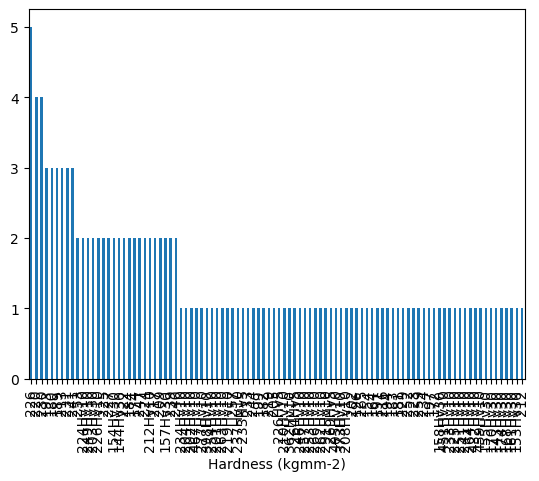

In [289]:
#plot categorical data

df['Hardness (kgmm-2)'].value_counts().plot(kind='bar')

In [290]:
#count the number of missing values

df['Hardness (kgmm-2)'].isnull().sum()

1514

In [291]:
df1['Hardness (kgmm-2)_numeric'] = pd.to_numeric(df1['Hardness (kgmm-2)'], errors='coerce')

# Identify rows where the conversion resulted in NaN (indicating non-numeric values)
problematic_entries = df1[df1['Hardness (kgmm-2)_numeric'].isna() & ~df1['Hardness (kgmm-2)'].isna()]['Hardness (kgmm-2)'].unique()

df1 = df1.drop(columns=['Hardness (kgmm-2)_numeric'])

problematic_entries  

array(['158(Hv30)', '155(Hv30)', '153(Hv30)', '161(Hv30)', '168(Hv30)',
       '203(Hv30)', '157(Hv30)', '174(Hv30)', '144(Hv30)', '143(Hv30)',
       '154(Hv30)', '170(Hv30)', '459Hv10', '405Hv10', '451Hv10',
       '432Hv10', '264Hv10', '241Hv10', '251Hv10', '225Hv10', '233Hv10',
       '208Hv10', '373Hv10', '224Hv10', '210Hv10', '212Hv10', '202Hv10',
       '204Hv10', '201Hv10', '398Hv10', '249Hv10', '226Hv10', '234Hv10',
       '219Hv10', '467Hv10', '277Hv10', '254Hv10', '263Hv10', '237Hv10',
       '362Hv10', '291Hv10', '262Hv10', '266Hv10', '253Hv10', '257Hv10',
       '246Hv10', '264Hv5', '269Hv5', '233Hv5', '226Hv5'], dtype=object)


In this column, we have two types of hardness values:

1. **Numerical values**: These are already standardized, such as `257`, `153`, etc.
2. **Mixed values**: These values are formatted as `xHVy` (e.g., `150Hv30`), where `x` is the hardness value and `y` is the load in kgf used during the test.

We need to standardize all the values in this column so that they are comparable, assuming a standard load of **10 kgf**.

We will use the following formula to standardize values to a common load (e.g., 10 kgf):



$$
Hv_{\text{standard}} = Hv_{\text{measured}} \times \left( \frac{L_{\text{standard}}}{L_{\text{measured}}} \right)^n
$$

Where:
- $ Hv_{\text{standard}} $ is the standardized hardness value.
- $ Hv_{\text{measured}} $ is the hardness value measured at a specific load.
- $  L_{\text{standard}} $ is the standard load we will choose (in this case, **10 kgf**).
- $  L_{\text{measured}} $ is the load used during the measurement (extracted from the notation `xHVy`).
- $  n  $ is an empirical constant, typically around **0.2** for metals.



For values that don't mention a load (e.g., `257`), we will assume the default load used was **10 kgf**, meaning no adjustment is necessary.


In [292]:
n=0.2
L_standard = 10

def transformer(x):
    try:
        return float(x)
    except:
        if x != np.nan :
            liste=x.split('Hv')
            L_measured = float(liste[1])
            HV_measured = float(liste[0])
            return HV_measured*((L_standard/L_measured)**n)

In [293]:
df['Hardness (kgmm-2)'] = df['Hardness (kgmm-2)'].apply(transformer)
df['Hardness (kgmm-2)'].unique()

array([         nan, 257.        , 227.        , 224.        ,
       226.        , 234.        , 217.        , 213.        ,
       209.        , 259.        , 239.        , 223.        ,
       230.        , 252.        , 241.        , 231.        ,
       229.        , 180.        , 174.        , 220.        ,
       184.        , 193.        , 189.        , 181.        ,
       183.        , 194.        , 216.        , 191.        ,
       164.        , 154.        , 265.        , 225.        ,
       196.        , 202.        , 197.        , 172.        ,
       126.83316676, 124.42494207, 122.81945895, 129.24139144,
       134.86058238, 162.95653704, 126.0304252 , 139.67703175,
       115.59478489, 114.79204333, 123.62220051, 136.4660655 ,
       459.        , 405.        , 451.        , 432.        ,
       264.        , 251.        , 233.        , 208.        ,
       373.        , 210.        , 212.        , 204.        ,
       201.        , 398.        , 249.        , 219.  

In [294]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1652 entries, 0 to 1651
Data columns (total 44 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Carbon concentration (weight%)                1652 non-null   float64
 1   Silicon concentration (weight%)               1652 non-null   float64
 2   Manganese concentration (weight%)             1652 non-null   float64
 3   Sulphur concentration (weight%)               1648 non-null   float64
 4   Phosphorus concentration (weight%)            1642 non-null   float64
 5   Nickel concentration (weight%)                697 non-null    float64
 6   Chromium concentration (weight%)              784 non-null    float64
 7   Molybdenum concentration (weight%)            793 non-null    float64
 8   Vanadium concentration (weight%)              928 non-null    float64
 9   Copper concentration (weight%)                578 non-null    f

let's see the remaining object columns

In [295]:
object_columns = df.select_dtypes(include=['object']).columns

df[object_columns]

,AC or DC,Electrode positive or negative,Type of weld,Weld ID
0,DC,+,MMA,Evans-Ni/CMn-1990/1991-0Aaw
1,DC,+,MMA,Evans-Ni/CMn-1990/1991-0Aawch
2,DC,+,MMA,Evans-Ni/CMn-1990/1991-0Aht
3,DC,+,MMA,Evans-Ni/CMn-1990/1991-0Baw
4,DC,+,MMA,Evans-Ni/CMn-1990/1991-0Bawch
...,...,...,...,...
1647,NaN,+,SA,Birmingham-MAX35
1648,NaN,+,SA,Birmingham-MAX36
1649,NaN,+,SA,Birmingham-MAX37
1650,NaN,+,SA,Birmingham-MAX38


-**One hot encoding for categorical columns**

In [296]:
df222 = pd.get_dummies(df, columns=['AC or DC', 'Electrode positive or negative'])[['AC or DC_AC',	'AC or DC_DC', 'Electrode positive or negative_+', 'Electrode positive or negative_-',	'Electrode positive or negative_0']]


-**correlation matrix for categorical values**

<Axes: >

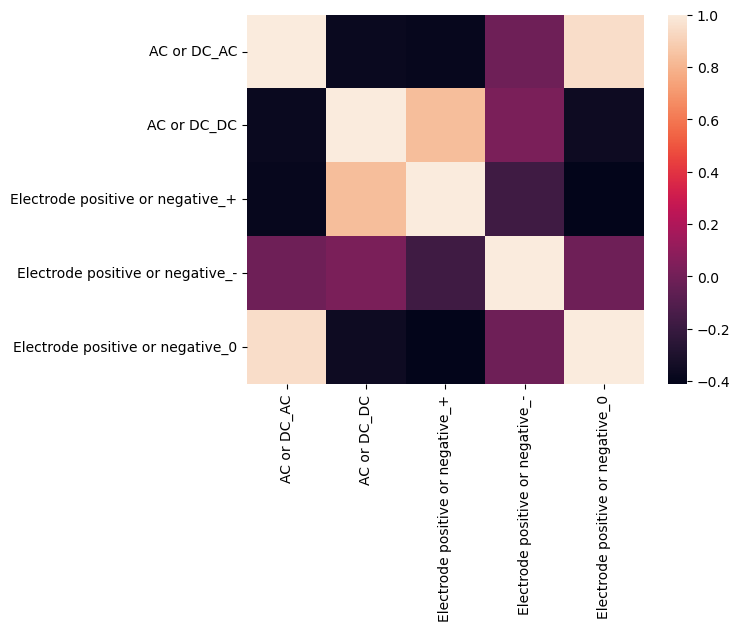

In [297]:
# correlation matrix plot 

import seaborn as sns

corr = df222.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)


In [298]:
df['AC or DC'].isna().sum()

215

In [299]:
df['Electrode positive or negative'].isna().sum()

156

We can see that the column ac or dc has more Nan values than  the Electrode positive or negative, and since they r correlated with the eletrode column, we will consider only the electrode column

In [300]:
df.drop(columns=['AC or DC'], inplace=True)

In [301]:
df = pd.get_dummies(df, columns=['Electrode positive or negative'])

Since we want to build a prediction model, we should deal with other categorical variables, let's adress the Type of weld column

In [302]:
# see all the unique values in the 'Type of weld' column
df['Type of weld'].unique()

array(['MMA', 'ShMA', 'FCA', 'SA', 'TSA', 'SAA', 'GTAA', 'GMAA', 'NGSAW',
       'NGGMA'], dtype=object)

In [303]:
#onehot encoding to 'Type of weld' column

df = pd.get_dummies(df, columns=['Type of weld'])

In [304]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1652 entries, 0 to 1651
Data columns (total 54 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Carbon concentration (weight%)                1652 non-null   float64
 1   Silicon concentration (weight%)               1652 non-null   float64
 2   Manganese concentration (weight%)             1652 non-null   float64
 3   Sulphur concentration (weight%)               1648 non-null   float64
 4   Phosphorus concentration (weight%)            1642 non-null   float64
 5   Nickel concentration (weight%)                697 non-null    float64
 6   Chromium concentration (weight%)              784 non-null    float64
 7   Molybdenum concentration (weight%)            793 non-null    float64
 8   Vanadium concentration (weight%)              928 non-null    float64
 9   Copper concentration (weight%)                578 non-null    f

### Justification du remplacement des colonnes de tension et d'intensité par une colonne de puissance

Les colonnes de **Voltage** (en volts) et d'**Current** (en ampères) ont été remplacées par une colonne unique représentant la **Puissance** (en watts). Ce choix est justifié par la relation physique qui lie ces trois grandeurs, à savoir que la puissance électrique est définie par le produit de la tension et de l'intensité
$$
P = U \times I
$$

L'ajout d'une colonne de puissance permet de capturer l'interaction entre la tension et l'intensité dans une seule variable, ce qui réduit la redondance des données et simplifie l'analyse tout en conservant une information complète. De plus, dans de nombreux cas d'application en modélisation, la puissance est plus représentative du comportement global d'un système électrique que ses composantes individuelles (tension et intensité).

In [305]:
df['Puissance (W)']=df['Voltage (V)']*df['Current (A)']
df['Puissance (W)']

0        3570.0
1        3570.0
2        3570.0
3        3570.0
4        3570.0
         ...   
1647    13500.0
1648    13500.0
1649    13500.0
1650    13500.0
1651    13500.0
Name: Puissance (W), Length: 1652, dtype: float64

In [306]:
df.drop(['Current (A)', 'Voltage (V)', 'Weld ID'], axis=1, inplace=True)


### Handling Missing values 

In [307]:
compute_Nan(df)

Colonne: Sulphur concentration (weight%), Missing: 4 (0.2%)
Colonne: Phosphorus concentration (weight%), Missing: 10 (0.6%)
Colonne: Nickel concentration (weight%), Missing: 955 (57.8%)
Colonne: Chromium concentration (weight%), Missing: 868 (52.5%)
Colonne: Molybdenum concentration (weight%), Missing: 859 (52.0%)
Colonne: Vanadium concentration (weight%), Missing: 724 (43.8%)
Colonne: Copper concentration (weight%), Missing: 1074 (65.0%)
Colonne: Cobalt concentration (weight%), Missing: 1523 (92.2%)
Colonne: Tungsten concentration (weight%), Missing: 1577 (95.5%)
Colonne: Oxygen concentration (ppm), Missing: 396 (24.0%)
Colonne: Titanium concentration (ppm), Missing: 717 (43.4%)
Colonne: Nitrogen concentration (ppm), Missing: 410 (24.8%)
Colonne: Aluminium concentration (ppm), Missing: 747 (45.2%)
Colonne: Boron concentration (ppm), Missing: 1148 (69.5%)
Colonne: Niobium concentration (ppm), Missing: 900 (54.5%)
Colonne: Tin concentration (ppm), Missing: 1356 (82.1%)
Colonne: Arsenic 

Based on related articles in the domain of welding and materials science, it is common to handle missing values of certain chemical elements differently. For instance:

- Missing values of **Phosphorus (P)** and **Sulphur (S)** are imputed using the **mean values** from the dataset.
- Other missing values of other elements such as **Manganese (Mn)**, **Nickel (Ni)**, etc., are set to **0** because these elements are not deliberately added and are likely close to the detection limit of the analytical techniques used.

Therefore, we will implement this preprocessing step to ensure that the dataset is correctly handled for the prediction task.

In [308]:
df['Sulphur concentration (weight%)'] = df['Sulphur concentration (weight%)'].fillna(df['Sulphur concentration (weight%)'].mean())
df['Phosphorus concentration (weight%)'] = df['Phosphorus concentration (weight%)'].fillna(df['Phosphorus concentration (weight%)'].mean())

# Replace missing values for all other concentrations with 0 (as they were not deliberately added)
elements_to_zero = ['Manganese concentration (weight%)', 'Sulphur concentration (weight%)',
       'Phosphorus concentration (weight%)', 'Nickel concentration (weight%)',
       'Chromium concentration (weight%)', 'Molybdenum concentration (weight%)',
       'Vanadium concentration (weight%)', 'Copper concentration (weight%)',
       'Cobalt concentration (weight%)', 'Tungsten concentration (weight%)',
       'Oxygen concentration (ppm)', 'Titanium concentration (ppm)',
       'Nitrogen concentration (ppm)', 'Aluminium concentration (ppm)',
       'Boron concentration (ppm)', 'Niobium concentration (ppm)',
       'Tin concentration (ppm)', 'Arsenic concentration (ppm)',
       'Antimony concentration (ppm)']

# Replace missing values with 0 for the other elements
df[elements_to_zero] = df[elements_to_zero].fillna(0)

In [309]:
compute_Nan(df)

Colonne: Post weld heat treatment temperature (deg C), Missing: 13 (0.8%)
Colonne: Post weld heat treatment time (hours), Missing: 13 (0.8%)
Colonne: Yield strength (MPa), Missing: 872 (52.8%)
Colonne: Ultimate tensile strength (MPa), Missing: 914 (55.3%)
Colonne: Elongation (%), Missing: 952 (57.6%)
Colonne: Reduction of Area (%), Missing: 947 (57.3%)
Colonne: Charpy temperature (deg C), Missing: 773 (46.8%)
Colonne: Charpy impact toughness (J), Missing: 773 (46.8%)
Colonne: Hardness (kgmm-2), Missing: 1514 (91.6%)
Colonne: 50 % FATT, Missing: 1621 (98.1%)
Colonne: Primary ferrite in microstructure (%), Missing: 1554 (94.1%)
Colonne: Ferrite with second phase (%), Missing: 1562 (94.6%)
Colonne: Acicular ferrite (%), Missing: 1562 (94.6%)
Colonne: Martensite (%), Missing: 1563 (94.6%)
Colonne: Ferrite with carbide aggregate (%), Missing: 1563 (94.6%)
Colonne: Puissance (W), Missing: 248 (15.0%)


In [310]:
df.to_csv('welddb/welddb_cleaned.csv', index=False)

A popular approach to missing data imputation is to use a model to
predict the missing values. This requires a model to be created for each input variable that has
missing values.

 Although any one among a range of different models can be used to predict the
missing values, the k-nearest neighbor (KNN) algorithm has proven to be generally effective,
often referred to as nearest neighbor imputation.

There are two approaches for handling the remaining missing data:

- **Deleting columns and rows with a very high missing rate**: In this approach, we will delete columns related to ferrite with a missing rate of 94%, martensite (94.6%), and 50% FATT (98%). For the remaining data, we will delete rows with missing values. After this, we will compute supervised models to predict the target variables: ["Elongation", "Reduction of Area", "Ultimate Tensile Strength (UTS)", and "Yield Strength"].

- **Imputation of missing values**: The second approach involves applying a model to impute the missing values, even for columns with a high missing rate. After imputation, we will use semi-supervised models to predict the target variables with missing values.

### Deleting columns a very high missing rate

In [311]:
df1=df.copy()

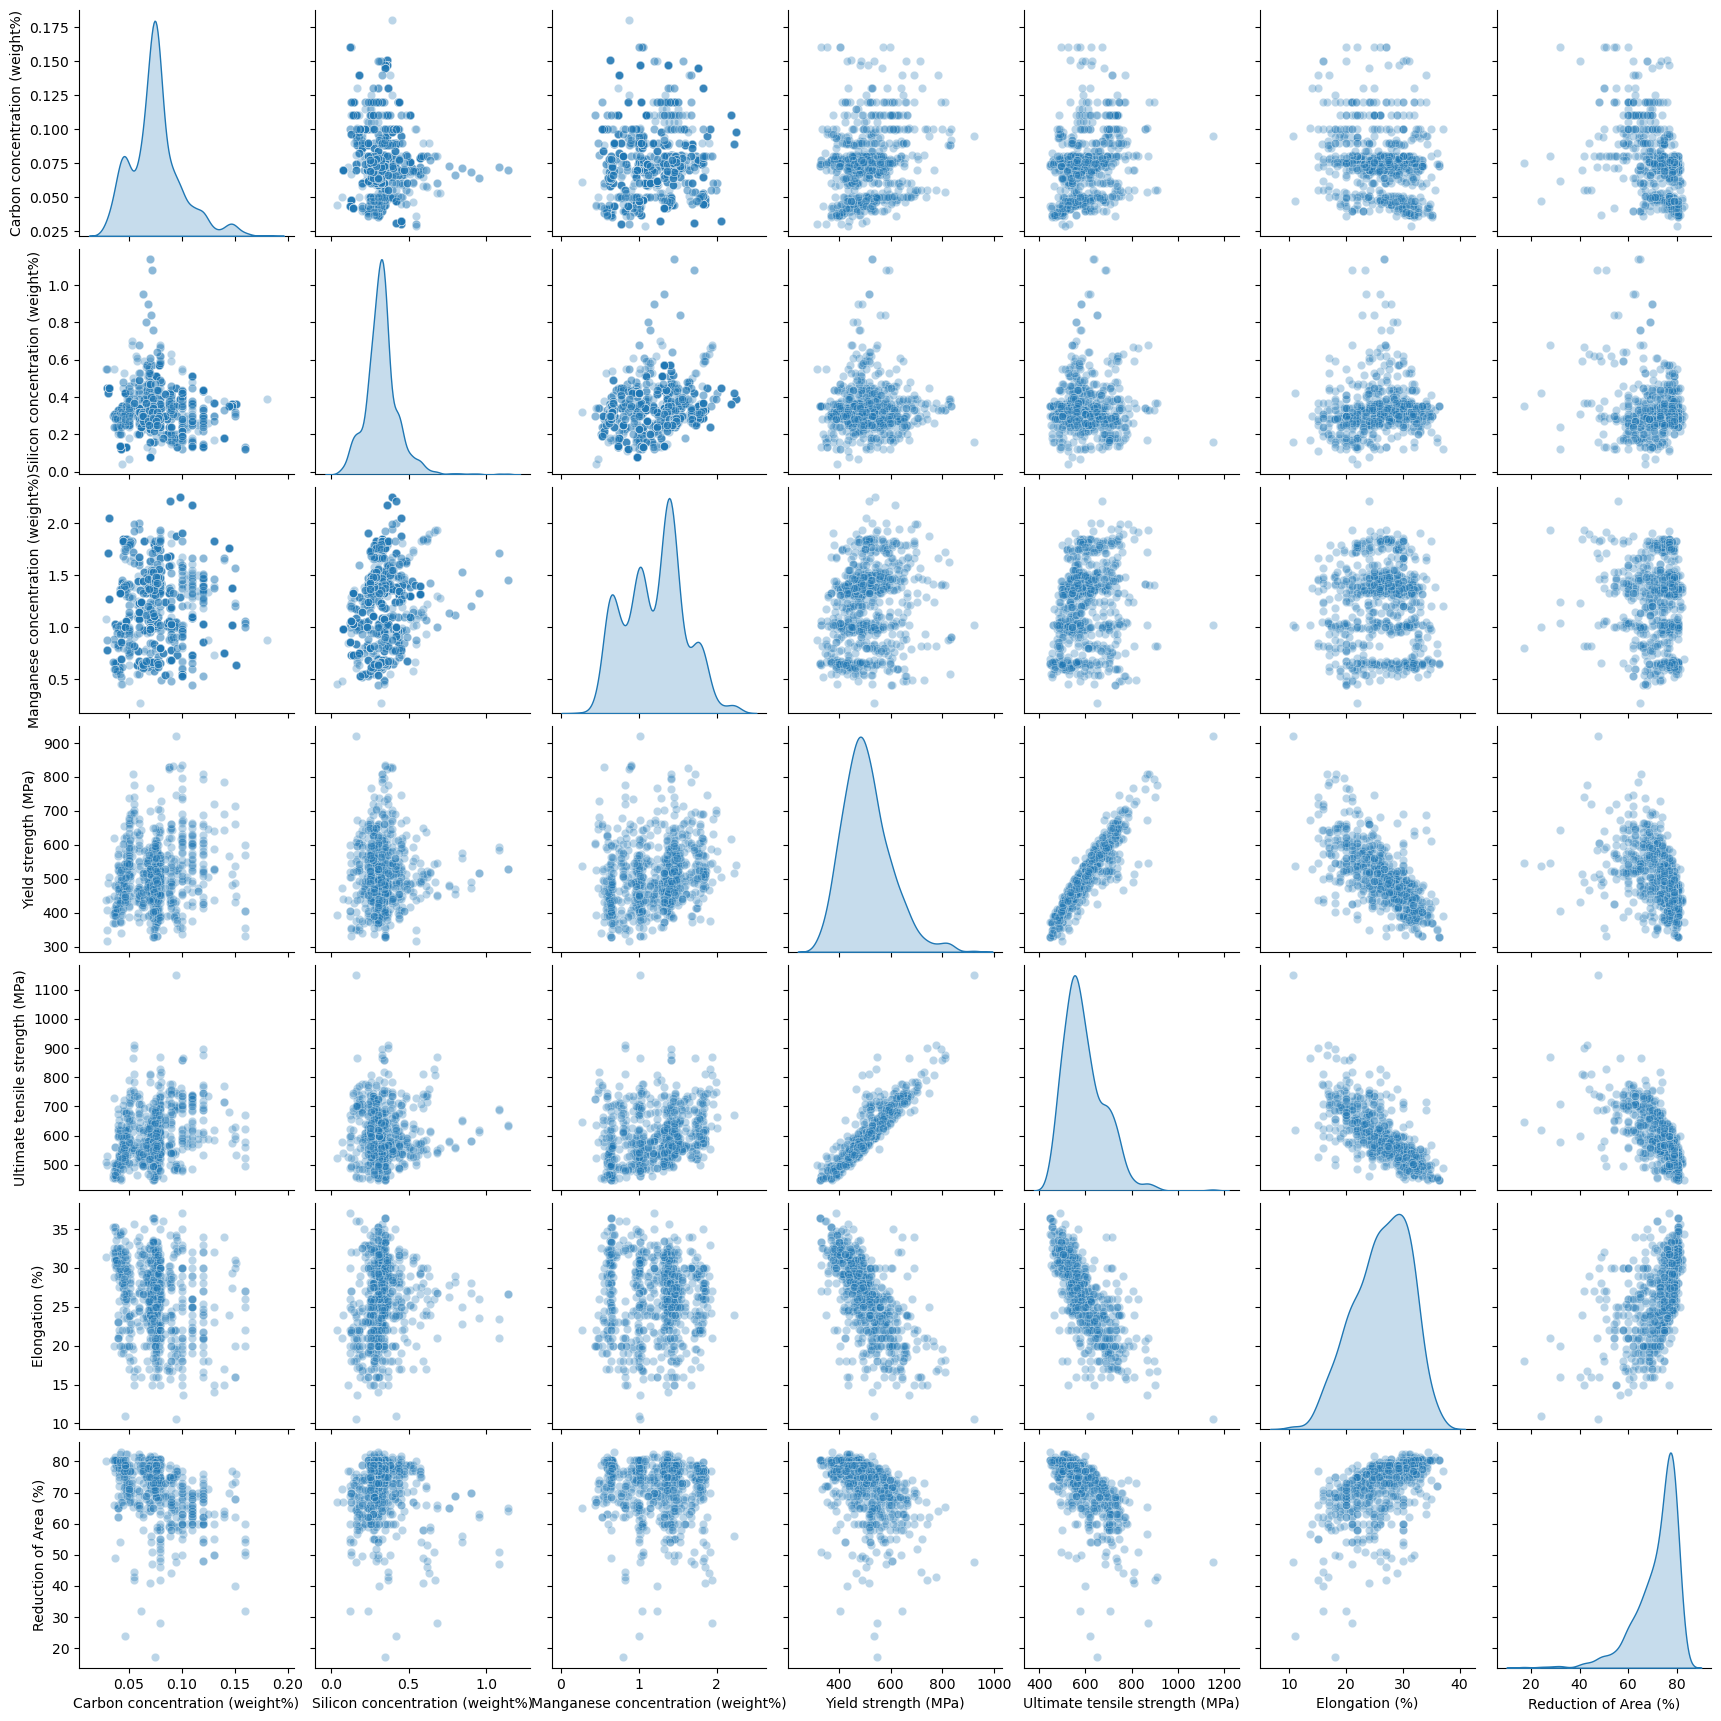

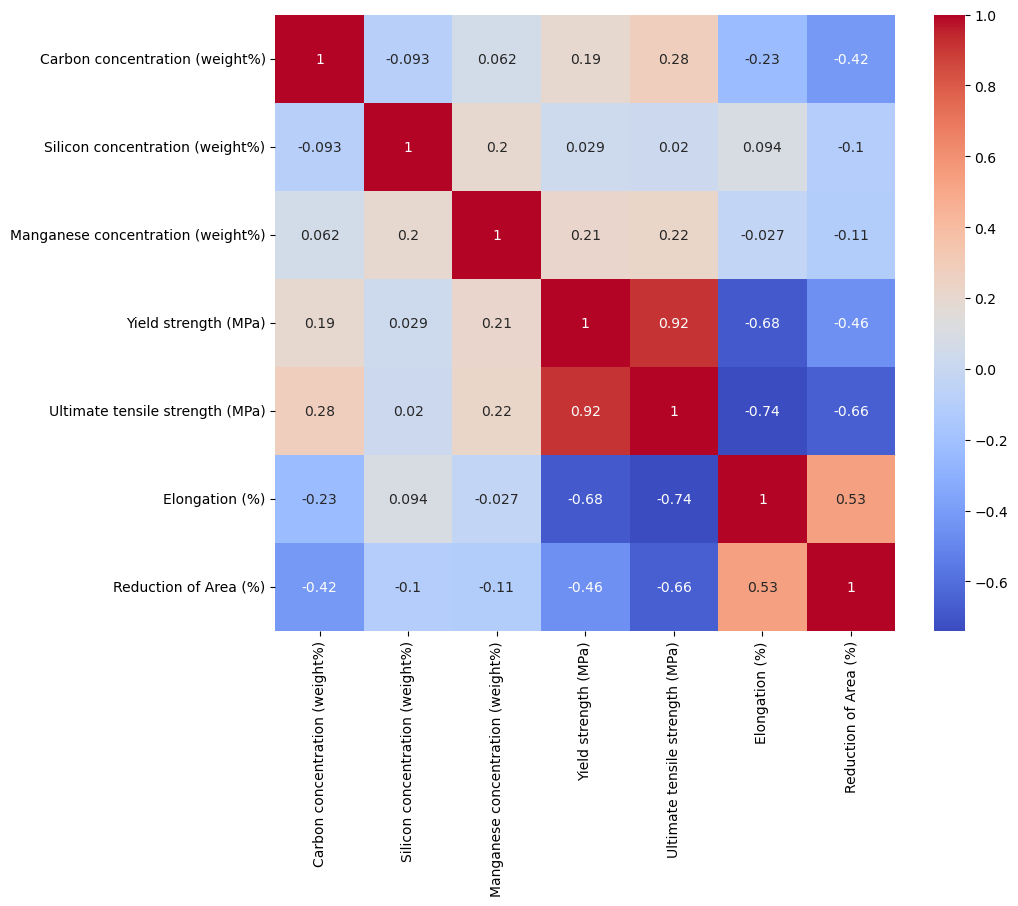

In [312]:
import seaborn as sns

# Pairplot to visualize relationships between features
pairplot_columns = [
    'Carbon concentration (weight%)', 'Silicon concentration (weight%)', 'Manganese concentration (weight%)', 
    'Yield strength (MPa)', 'Ultimate tensile strength (MPa)', 'Elongation (%)', 'Reduction of Area (%)'
]
sns.pairplot(df1[pairplot_columns], diag_kind="kde", plot_kws={"alpha": 0.3})

plt.show()

# Heatmap of correlations
corr = df1[pairplot_columns].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

In [313]:
compute_Nan(df1)

Colonne: Post weld heat treatment temperature (deg C), Missing: 13 (0.8%)
Colonne: Post weld heat treatment time (hours), Missing: 13 (0.8%)
Colonne: Yield strength (MPa), Missing: 872 (52.8%)
Colonne: Ultimate tensile strength (MPa), Missing: 914 (55.3%)
Colonne: Elongation (%), Missing: 952 (57.6%)
Colonne: Reduction of Area (%), Missing: 947 (57.3%)
Colonne: Charpy temperature (deg C), Missing: 773 (46.8%)
Colonne: Charpy impact toughness (J), Missing: 773 (46.8%)
Colonne: Hardness (kgmm-2), Missing: 1514 (91.6%)
Colonne: 50 % FATT, Missing: 1621 (98.1%)
Colonne: Primary ferrite in microstructure (%), Missing: 1554 (94.1%)
Colonne: Ferrite with second phase (%), Missing: 1562 (94.6%)
Colonne: Acicular ferrite (%), Missing: 1562 (94.6%)
Colonne: Martensite (%), Missing: 1563 (94.6%)
Colonne: Ferrite with carbide aggregate (%), Missing: 1563 (94.6%)
Colonne: Puissance (W), Missing: 248 (15.0%)


In [314]:
# Define columns with high missing rates (based on the 94%+ threshold)
columns_to_drop = ['Primary ferrite in microstructure (%)', 'Ferrite with second phase (%)',
                   'Acicular ferrite (%)', 'Martensite (%)','Ferrite with carbide aggregate (%)', '50 % FATT','Hardness (kgmm-2)']

In [315]:
# Drop columns with high missing rates
df_cleaned = df1.drop(columns=columns_to_drop)

In [316]:
compute_Nan(df_cleaned)

Colonne: Post weld heat treatment temperature (deg C), Missing: 13 (0.8%)
Colonne: Post weld heat treatment time (hours), Missing: 13 (0.8%)
Colonne: Yield strength (MPa), Missing: 872 (52.8%)
Colonne: Ultimate tensile strength (MPa), Missing: 914 (55.3%)
Colonne: Elongation (%), Missing: 952 (57.6%)
Colonne: Reduction of Area (%), Missing: 947 (57.3%)
Colonne: Charpy temperature (deg C), Missing: 773 (46.8%)
Colonne: Charpy impact toughness (J), Missing: 773 (46.8%)
Colonne: Puissance (W), Missing: 248 (15.0%)


Now we delete rows with missing values in the target variables (Yield Strength, Ultimate Tensile Strength (UTS), Elongation, and Reduction of Area)

In [317]:
target_variables = ['Yield strength (MPa)', 'Ultimate tensile strength (MPa)', 'Elongation (%)', 'Reduction of Area (%)']
df__cleaned = df_cleaned.dropna(subset=target_variables)


Lets see first the corrlqtion beetween target variables and charpy paramaters 

In [318]:
import seaborn as sns


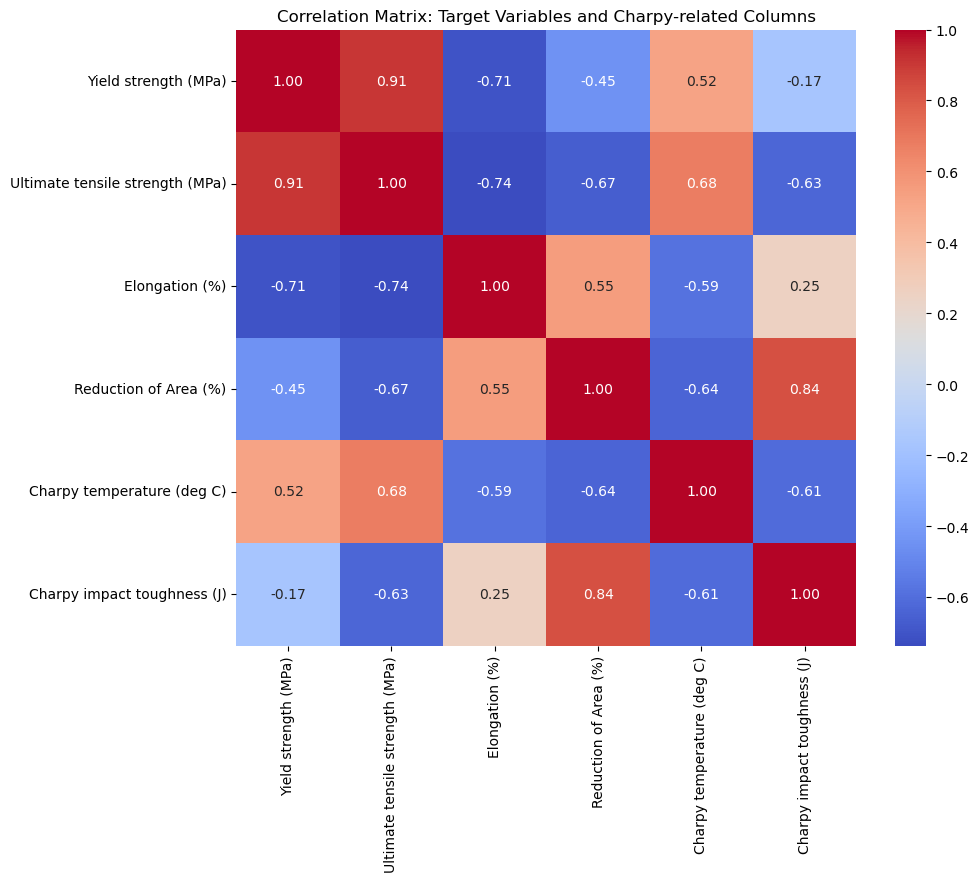

In [319]:
import seaborn as sns

subset= df__cleaned[['Yield strength (MPa)', 'Ultimate tensile strength (MPa)', 'Elongation (%)', 'Reduction of Area (%)','Charpy temperature (deg C)', 'Charpy impact toughness (J)']]

corr_matrix = subset.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix: Target Variables and Charpy-related Columns')
plt.show()

In [320]:
compute_Nan(df__cleaned)

Colonne: Charpy temperature (deg C), Missing: 516 (79.4%)
Colonne: Charpy impact toughness (J), Missing: 516 (79.4%)
Colonne: Puissance (W), Missing: 111 (17.1%)


In [321]:
df__cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 650 entries, 0 to 1640
Data columns (total 45 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Carbon concentration (weight%)                650 non-null    float64
 1   Silicon concentration (weight%)               650 non-null    float64
 2   Manganese concentration (weight%)             650 non-null    float64
 3   Sulphur concentration (weight%)               650 non-null    float64
 4   Phosphorus concentration (weight%)            650 non-null    float64
 5   Nickel concentration (weight%)                650 non-null    float64
 6   Chromium concentration (weight%)              650 non-null    float64
 7   Molybdenum concentration (weight%)            650 non-null    float64
 8   Vanadium concentration (weight%)              650 non-null    float64
 9   Copper concentration (weight%)                650 non-null    float64

After removing rows with missing target values, we result now a significant percentage of missing values remaining in some columns that we can't drop because of the size of data.



In [322]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.linear_model import BayesianRidge  # Importer BayesianRidge

# Applying Iterative Imputer for the 'Charpy temperature (deg C)' and 'Charpy impact toughness (J)'
iterative_imputer = IterativeImputer(random_state=42)

# Selecting the columns to impute
columns_to_impute = ['Charpy temperature (deg C)', 'Charpy impact toughness (J)','Puissance (W)']
charpy_data = df__cleaned[columns_to_impute]
imputer = IterativeImputer(estimator=BayesianRidge(), n_nearest_features=None,
                           imputation_order='ascending', random_state=42)
imputer.fit(charpy_data)
# Fitting and transforming using Iterative Imputer
imputed_charpy_data = imputer.transform(charpy_data)

# Replacing the original columns with imputed values
df__cleaned[columns_to_impute] = imputed_charpy_data

C:\Users\ASUS\AppData\Local\Temp\ipykernel_15204\3278155315.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df__cleaned[columns_to_impute] = imputed_charpy_data


In [323]:
compute_Nan(df__cleaned)

In [324]:
df__cleaned.shape


(650, 45)

In [325]:
df__cleaned

,Carbon concentration (weight%),Silicon concentration (weight%),Manganese concentration (weight%),Sulphur concentration (weight%),Phosphorus concentration (weight%),Nickel concentration (weight%),Chromium concentration (weight%),Molybdenum concentration (weight%),Vanadium concentration (weight%),Copper concentration (weight%),...,Type of weld_GMAA,Type of weld_GTAA,Type of weld_MMA,Type of weld_NGGMA,Type of weld_NGSAW,Type of weld_SA,Type of weld_SAA,Type of weld_ShMA,Type of weld_TSA,Puissance (W)
0,0.037,0.30,0.65,0.008,0.012,0.0,0.00,0.0,0.0000,0.00,...,False,False,True,False,False,False,False,False,False,3570.000000
2,0.037,0.30,0.65,0.008,0.012,0.0,0.00,0.0,0.0000,0.00,...,False,False,True,False,False,False,False,False,False,3570.000000
3,0.037,0.31,1.03,0.007,0.014,0.0,0.00,0.0,0.0000,0.00,...,False,False,True,False,False,False,False,False,False,3570.000000
5,0.037,0.31,1.03,0.007,0.014,0.0,0.00,0.0,0.0000,0.00,...,False,False,True,False,False,False,False,False,False,3570.000000
6,0.044,0.35,1.43,0.007,0.014,0.0,0.00,0.0,0.0000,0.00,...,False,False,True,False,False,False,False,False,False,3570.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1628,0.073,0.29,1.53,0.007,0.010,0.0,1.53,0.0,0.0005,0.00,...,False,False,True,False,False,False,False,False,False,8476.103896
1631,0.078,0.29,1.48,0.007,0.010,0.0,1.96,0.0,0.0005,0.00,...,False,False,True,False,False,False,False,False,False,8476.103896
1634,0.076,0.27,1.48,0.007,0.008,0.0,0.00,0.0,0.0005,0.53,...,False,False,True,False,False,False,False,False,False,8476.103896
1637,0.077,0.25,1.43,0.007,0.008,0.0,0.00,0.0,0.0005,1.08,...,False,False,True,False,False,False,False,False,False,8476.103896


In [326]:
df__cleaned.to_csv('welddb/welddb_complete.csv', index=False)

In [333]:
compute_Nan(df__cleaned)

Now we have  this complete data , we can use some supervised machine learning algorithms to predict

WE created two different pipelines , one with normalization and the other with standardization. Both pipelines will scale the data and then apply XGBoost to the scaled data.

In [334]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
df = pd.read_csv("welddb/welddb_complete.csv")
# Define target variables
target_variables = ['Yield strength (MPa)', 'Ultimate tensile strength (MPa)', 'Elongation (%)', 'Reduction of Area (%)']

# Pipeline definitions
pipeline_standardization = Pipeline([('scaler', StandardScaler()), ('xgboost', XGBRegressor(random_state=42))])
pipeline_normalization = Pipeline([('scaler', MinMaxScaler()), ('xgboost', XGBRegressor(random_state=42))])

def evaluate_metrics(y_test, y_pred):
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    return mse, rmse, mae, r2



In [335]:
results_list = []

for target_variable in target_variables:
    X = df.drop(target_variables, axis=1)
    y = df[target_variable]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Standardization Pipeline
    pipeline_standardization.fit(X_train, y_train)
    y_pred_standardization = pipeline_standardization.predict(X_test)
    mse_std, rmse_std, mae_std, r2_std = evaluate_metrics(y_test, y_pred_standardization)
    results_list.append({'Target Variable': target_variable, 'Pipeline': 'Standardization', 'MSE': mse_std, 'RMSE': rmse_std, 'MAE': mae_std, 'R²': r2_std})

    # Normalization Pipeline
    pipeline_normalization.fit(X_train, y_train)
    y_pred_normalization = pipeline_normalization.predict(X_test)
    mse_norm, rmse_norm, mae_norm, r2_norm = evaluate_metrics(y_test, y_pred_normalization)
    results_list.append({'Target Variable': target_variable, 'Pipeline': 'Normalization', 'MSE': mse_norm, 'RMSE': rmse_norm, 'MAE': mae_norm, 'R²': r2_norm})

# Results
results_df = pd.DataFrame(results_list)
print(results_df)


                   Target Variable         Pipeline          MSE       RMSE  \
0             Yield strength (MPa)  Standardization  2107.087531  45.903023   
1             Yield strength (MPa)    Normalization  2107.087531  45.903023   
2  Ultimate tensile strength (MPa)  Standardization  1281.260935  35.794705   
3  Ultimate tensile strength (MPa)    Normalization  1281.260935  35.794705   
4                   Elongation (%)  Standardization     5.658888   2.378842   
5                   Elongation (%)    Normalization     5.658888   2.378842   
6            Reduction of Area (%)  Standardization    50.593472   7.112909   
7            Reduction of Area (%)    Normalization    50.593472   7.112909   

         MAE        R²  
0  25.030444  0.738487  
1  25.030444  0.738487  
2  19.023895  0.871355  
3  19.023895  0.871355  
4   1.773549  0.767174  
5   1.773549  0.767174  
6   2.812315  0.429214  
7   2.812315  0.429214  


In [250]:
results_df

,Target Variable,Pipeline,MSE,RMSE,MAE,R²
0,Yield strength (MPa),Standardization,2107.087531,45.903023,25.030444,0.738487
1,Yield strength (MPa),Normalization,2107.087531,45.903023,25.030444,0.738487
2,Ultimate tensile strength (MPa),Standardization,1281.260935,35.794705,19.023895,0.871355
3,Ultimate tensile strength (MPa),Normalization,1281.260935,35.794705,19.023895,0.871355
4,Elongation (%),Standardization,5.658888,2.378842,1.773549,0.767174
5,Elongation (%),Normalization,5.658888,2.378842,1.773549,0.767174
6,Reduction of Area (%),Standardization,50.593472,7.112909,2.812315,0.429214
7,Reduction of Area (%),Normalization,50.593472,7.112909,2.812315,0.429214


We remark that the model perform the same way with standarization or normalization so we are goin to use just one.

Let's see if we can  further optimize the model.

## Hyperparameters tuning

### Yeild strength


In [342]:
from xgboost import plot_importance


Optimized Model RMSE: 43.06289337185099
Optimized Model R²: 0.769846912262501


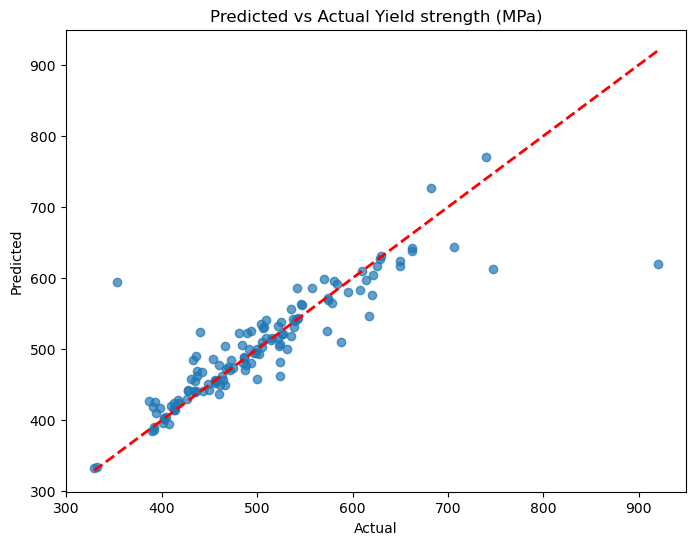

<Figure size 1000x800 with 0 Axes>

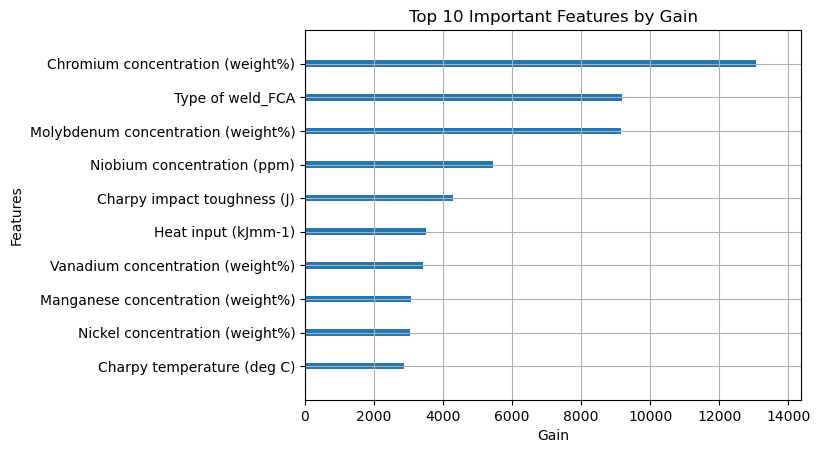

In [346]:
from sklearn.model_selection import GridSearchCV

# Define the target variable
target_variable = 'Yield strength (MPa)'
X = df.drop(target_variables, axis=1)
y = df[target_variable]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Hyperparameter grid
xgb_params = {'n_estimators': [100, 200, 500], 'learning_rate': [0.01, 0.05, 0.1], 'max_depth': [3, 5, 7]}

# Grid search
pipeline_standardization = Pipeline([('scaler', StandardScaler()), ('xgb', XGBRegressor())])
grid_search = GridSearchCV(pipeline_standardization, param_grid={'xgb__' + key: value for key, value in xgb_params.items()}, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Best parameters and predictions
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Evaluation
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
print(f'Optimized Model RMSE: {rmse}')
print(f'Optimized Model R²: {r2}')
# Plot the predicted vs actual values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r', linewidth=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title(f'Predicted vs Actual {target_variable}')
plt.show()

# Plot the feature importance with feature names
plt.figure(figsize=(10, 8))
plot_importance(xgb_model, importance_type='gain', max_num_features=10, show_values=False, xlabel="Gain")
plt.title('Top 10 Important Features by Gain')
plt.show()

### Ultimate tensile strength

Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best hyperparameters found:  {'xgb__learning_rate': 0.1, 'xgb__max_depth': 3, 'xgb__n_estimators': 500}
Optimized Model RMSE: 38.48859968934555
Optimized Model R²: 0.8512632091118033


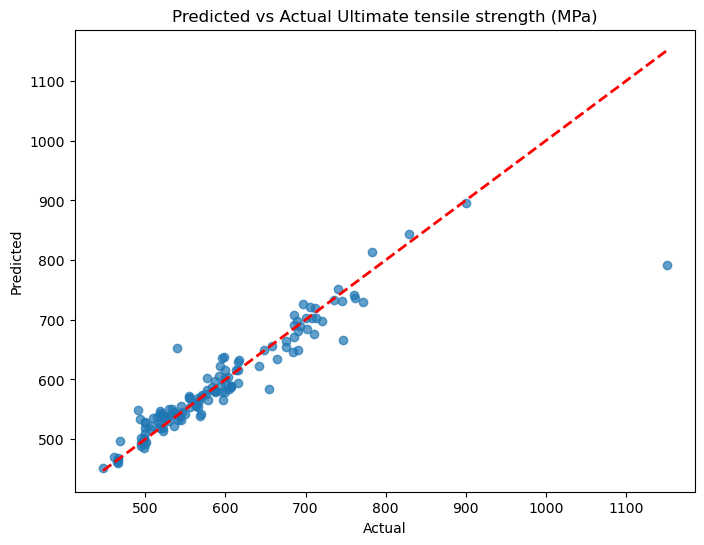

<Figure size 1000x800 with 0 Axes>

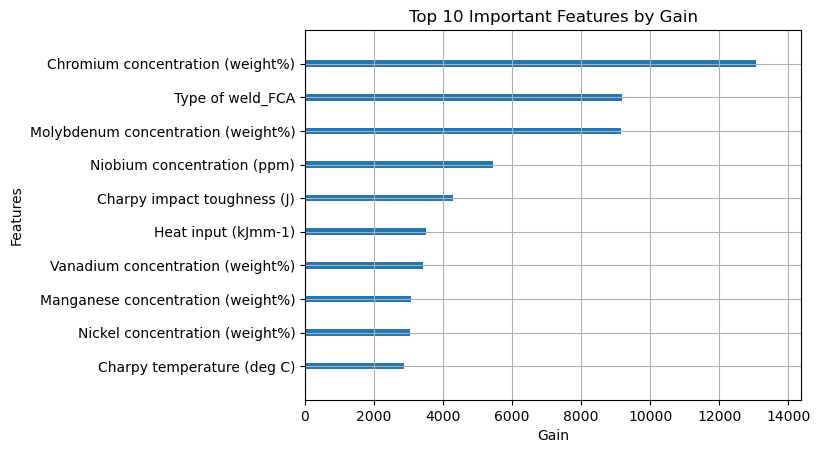

In [347]:


# Define the target variable for the example
target_variable = 'Ultimate tensile strength (MPa)'  # You can change this to your desired target

# Define features and target
X = df.drop(['Yield strength (MPa)', 'Ultimate tensile strength (MPa)', 'Elongation (%)', 'Reduction of Area (%)'], axis=1)
y = df[target_variable]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Hyperparameter grid
xgb_params = {
    'n_estimators': [100, 200, 500],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 7],
    #'subsample': [0.8, 1.0],
    #'colsample_bytree': [0.8, 1.0],
    #'gamma': [0, 1, 5],
    #'reg_alpha': [0, 0.1, 1],
    #'reg_lambda': [1, 0.1, 10]
}

# Create pipeline for standardization and XGBoost
pipeline_standardization = Pipeline([
    ('scaler', StandardScaler()),  # Standardization
    ('xgb', XGBRegressor())  # XGBoost Regressor
])

# Set up GridSearchCV
grid_search = GridSearchCV(
    pipeline_standardization,
    param_grid={'xgb__' + key: value for key, value in xgb_params.items()},
    cv=5,  # 5-fold cross-validation
    scoring='neg_mean_squared_error',  # Optimizing for MSE
    n_jobs=-1,  # Use all processors
    verbose=1
)

# Fit GridSearchCV to find the best parameters
grid_search.fit(X_train, y_train)

# Best hyperparameters
best_params = grid_search.best_params_
print("Best hyperparameters found: ", best_params)

# Use the best model to predict on the test set
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Evaluate the performance
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
print(f'Optimized Model RMSE: {rmse}')
print(f'Optimized Model R²: {r2}')
# Plot the predicted vs actual values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r', linewidth=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title(f'Predicted vs Actual {target_variable}')
plt.show()

# Plot the feature importance with feature names
plt.figure(figsize=(10, 8))
plot_importance(xgb_model, importance_type='gain', max_num_features=10, show_values=False, xlabel="Gain")
plt.title('Top 10 Important Features by Gain')
plt.show()

### Elongation

Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best hyperparameters found:  {'xgb__learning_rate': 0.1, 'xgb__max_depth': 3, 'xgb__n_estimators': 200}
Optimized Model RMSE: 2.377148748782526
Optimized Model R²: 0.7675048101066267


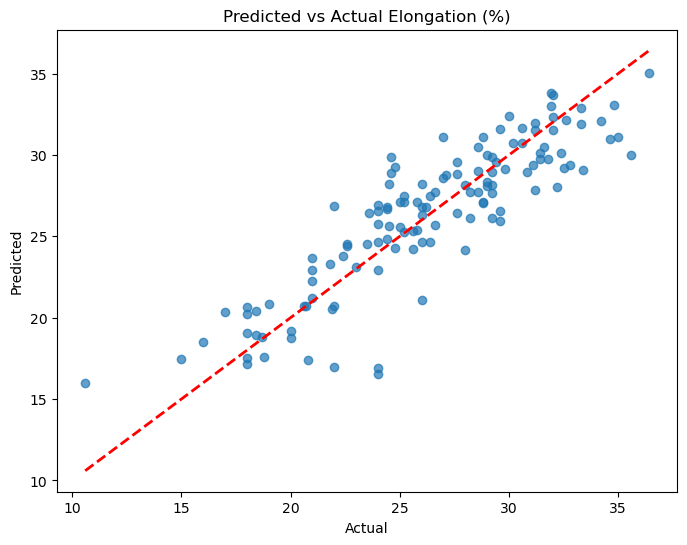

<Figure size 1000x800 with 0 Axes>

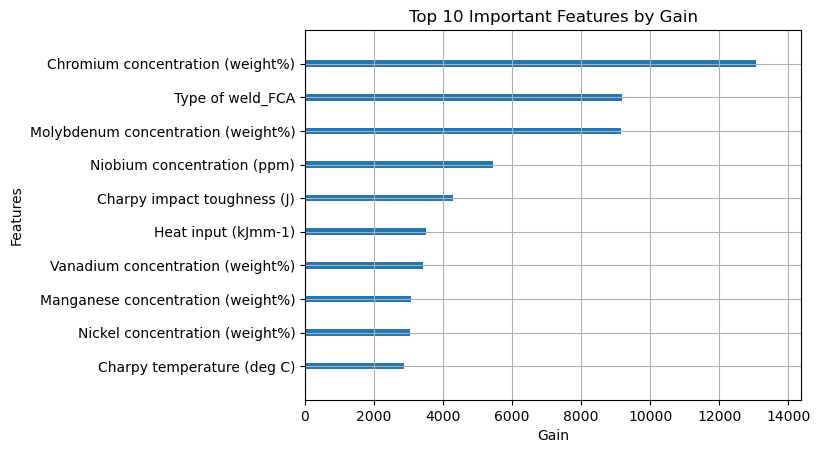

In [348]:


# Define the target variable for the example
target_variable = 'Elongation (%)'  # You can change this to your desired target

# Define features and target
X = df.drop(['Yield strength (MPa)', 'Ultimate tensile strength (MPa)', 'Elongation (%)', 'Reduction of Area (%)'], axis=1)
y = df[target_variable]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Hyperparameter grid
xgb_params = {
    'n_estimators': [100, 200, 500],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 7],
    #'subsample': [0.8, 1.0],
    #'colsample_bytree': [0.8, 1.0],
    #'gamma': [0, 1, 5],
    #'reg_alpha': [0, 0.1, 1],
    #'reg_lambda': [1, 0.1, 10]
}

# Create pipeline for standardization and XGBoost
pipeline_standardization = Pipeline([
    ('scaler', StandardScaler()),  # Standardization
    ('xgb', XGBRegressor())  # XGBoost Regressor
])

# Set up GridSearchCV
grid_search = GridSearchCV(
    pipeline_standardization,
    param_grid={'xgb__' + key: value for key, value in xgb_params.items()},
    cv=5,  # 5-fold cross-validation
    scoring='neg_mean_squared_error',  # Optimizing for MSE
    n_jobs=-1,  # Use all processors
    verbose=1
)

# Fit GridSearchCV to find the best parameters
grid_search.fit(X_train, y_train)

# Best hyperparameters
best_params = grid_search.best_params_
print("Best hyperparameters found: ", best_params)

# Use the best model to predict on the test set
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Evaluate the performance
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
print(f'Optimized Model RMSE: {rmse}')
print(f'Optimized Model R²: {r2}')
# Plot the predicted vs actual values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r', linewidth=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title(f'Predicted vs Actual {target_variable}')
plt.show()

# Plot the feature importance with feature names
plt.figure(figsize=(10, 8))
plot_importance(xgb_model, importance_type='gain', max_num_features=10, show_values=False, xlabel="Gain")
plt.title('Top 10 Important Features by Gain')
plt.show()


### Reduction of Area (%)

Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best hyperparameters found:  {'xgb__learning_rate': 0.05, 'xgb__max_depth': 3, 'xgb__n_estimators': 500}
Optimized Model RMSE: 6.268076473907937
Optimized Model R²: 0.5567515097955145


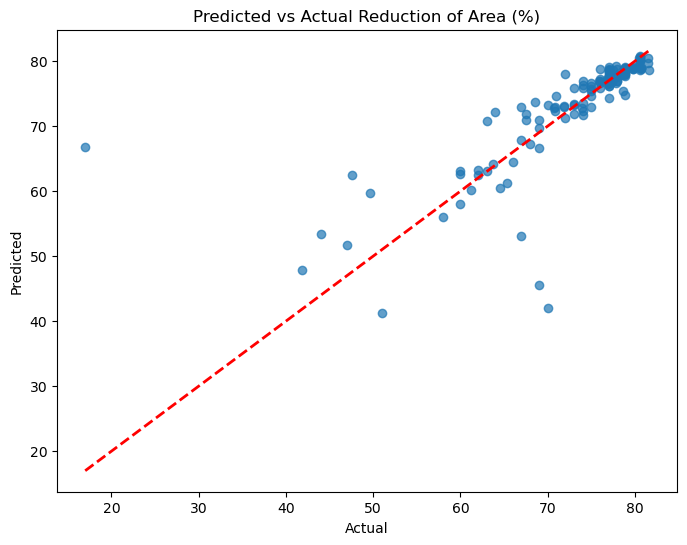

<Figure size 1000x800 with 0 Axes>

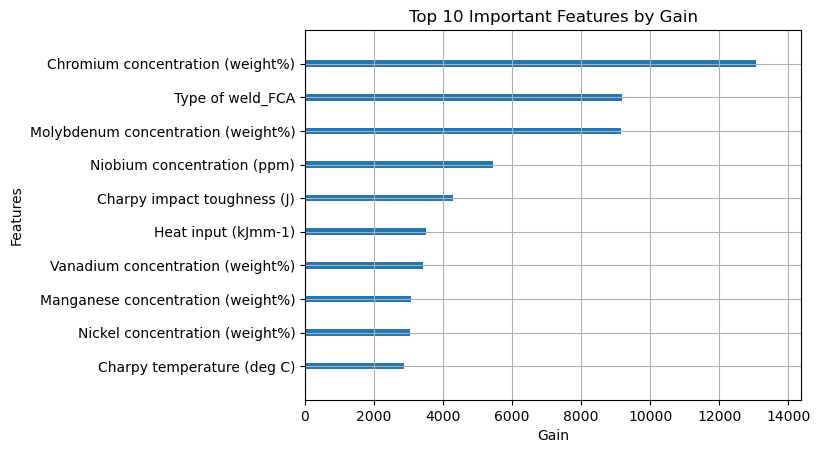

In [349]:


# Define the target variable for the example
target_variable = 'Reduction of Area (%)'  # You can change this to your desired target

# Define features and target
X = df.drop(['Yield strength (MPa)', 'Ultimate tensile strength (MPa)', 'Elongation (%)', 'Reduction of Area (%)'], axis=1)
y = df[target_variable]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Hyperparameter grid
xgb_params = {
    'n_estimators': [100, 200, 500],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 7],
    #'subsample': [0.8, 1.0],
    #'colsample_bytree': [0.8, 1.0],
    #'gamma': [0, 1, 5],
    #'reg_alpha': [0, 0.1, 1],
    #'reg_lambda': [1, 0.1, 10]
}

# Create pipeline for standardization and XGBoost
pipeline_standardization = Pipeline([
    ('scaler', StandardScaler()),  # Standardization
    ('xgb', XGBRegressor())  # XGBoost Regressor
])

# Set up GridSearchCV
grid_search = GridSearchCV(
    pipeline_standardization,
    param_grid={'xgb__' + key: value for key, value in xgb_params.items()},
    cv=5,  # 5-fold cross-validation
    scoring='neg_mean_squared_error',  # Optimizing for MSE
    n_jobs=-1,  # Use all processors
    verbose=1
)

# Fit GridSearchCV to find the best parameters
grid_search.fit(X_train, y_train)

# Best hyperparameters
best_params = grid_search.best_params_
print("Best hyperparameters found: ", best_params)

# Use the best model to predict on the test set
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Evaluate the performance
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
print(f'Optimized Model RMSE: {rmse}')
print(f'Optimized Model R²: {r2}')
# Plot the predicted vs actual values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r', linewidth=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title(f'Predicted vs Actual {target_variable}')
plt.show()

# Plot the feature importance with feature names
plt.figure(figsize=(10, 8))
plot_importance(xgb_model, importance_type='gain', max_num_features=10, show_values=False, xlabel="Gain")
plt.title('Top 10 Important Features by Gain')
plt.show()

 # Gradient Boosted Trees


### 'Yield strength (MPa)'

Gradient Boosted Trees Model - Yield Strength Prediction
RMSE: 43.868979928286834
R²: 0.7611498794334598


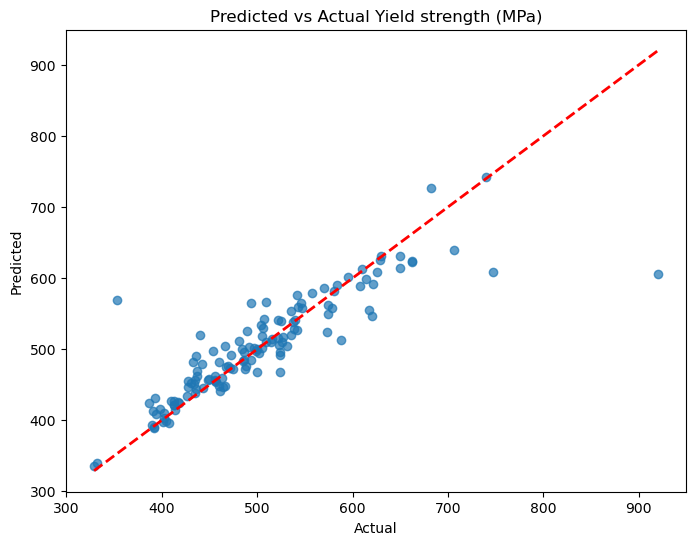

<Figure size 1000x800 with 0 Axes>

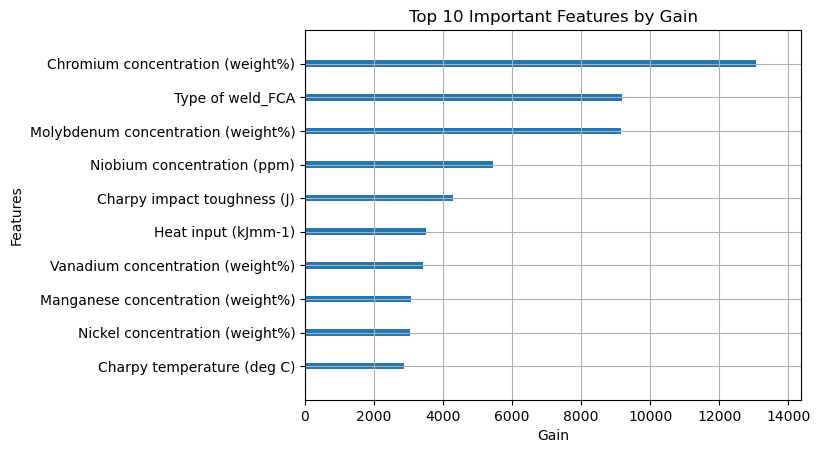

In [350]:
# Import necessary libraries
from xgboost import XGBRegressor, plot_importance  
from sklearn.model_selection import  RandomizedSearchCV


# Define the target and feature variables
target_variable = 'Yield strength (MPa)'  # You can change this to another target variable if needed
X = df.drop(columns=['Yield strength (MPa)', 'Ultimate tensile strength (MPa)', 'Elongation (%)', 'Reduction of Area (%)'])
y = df[target_variable]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the Gradient Boosting model using XGBoost
xgb_model = XGBRegressor(
    objective='reg:squarederror',  # For regression tasks
    n_estimators=500,              # Number of trees
    learning_rate=0.05,            # Step size shrinkage to prevent overfitting
    max_depth=6,                   # Depth of trees (controls model complexity)
    subsample=0.8,                 # Subsample ratio to reduce variance
    colsample_bytree=0.8,          # Subsample ratio of columns
    random_state=42                # Ensures reproducibility
)

# Train the model
xgb_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = xgb_model.predict(X_test)

# Evaluate model performance
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f'Gradient Boosted Trees Model - Yield Strength Prediction')
print(f'RMSE: {rmse}')
print(f'R²: {r2}')

# Plot the predicted vs actual values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r', linewidth=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title(f'Predicted vs Actual {target_variable}')
plt.show()

# Plot the feature importance with feature names
plt.figure(figsize=(10, 8))
plot_importance(xgb_model, importance_type='gain', max_num_features=10, show_values=False, xlabel="Gain")
plt.title('Top 10 Important Features by Gain')
plt.show()